# Importing Necessary Libraries

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

# Loading the dataset

In [161]:
data = pd.read_csv('./data.csv')

# Data Cleaning
# Drop unnecessary columns
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Visualizing the target Variable

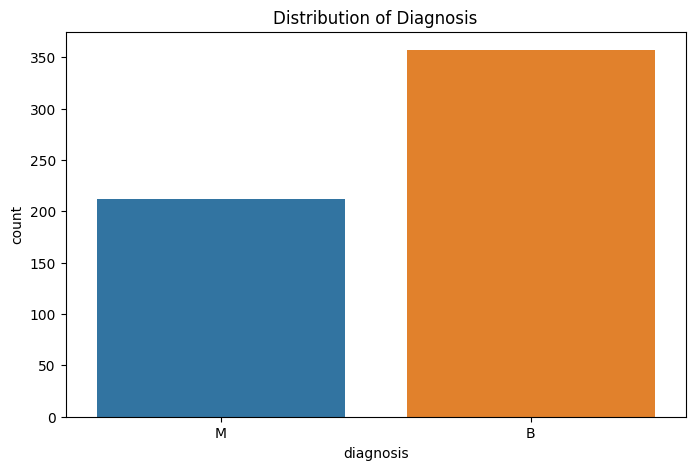

In [162]:
plt.figure(figsize=(8, 5))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

# Visualize the distribution of some key features

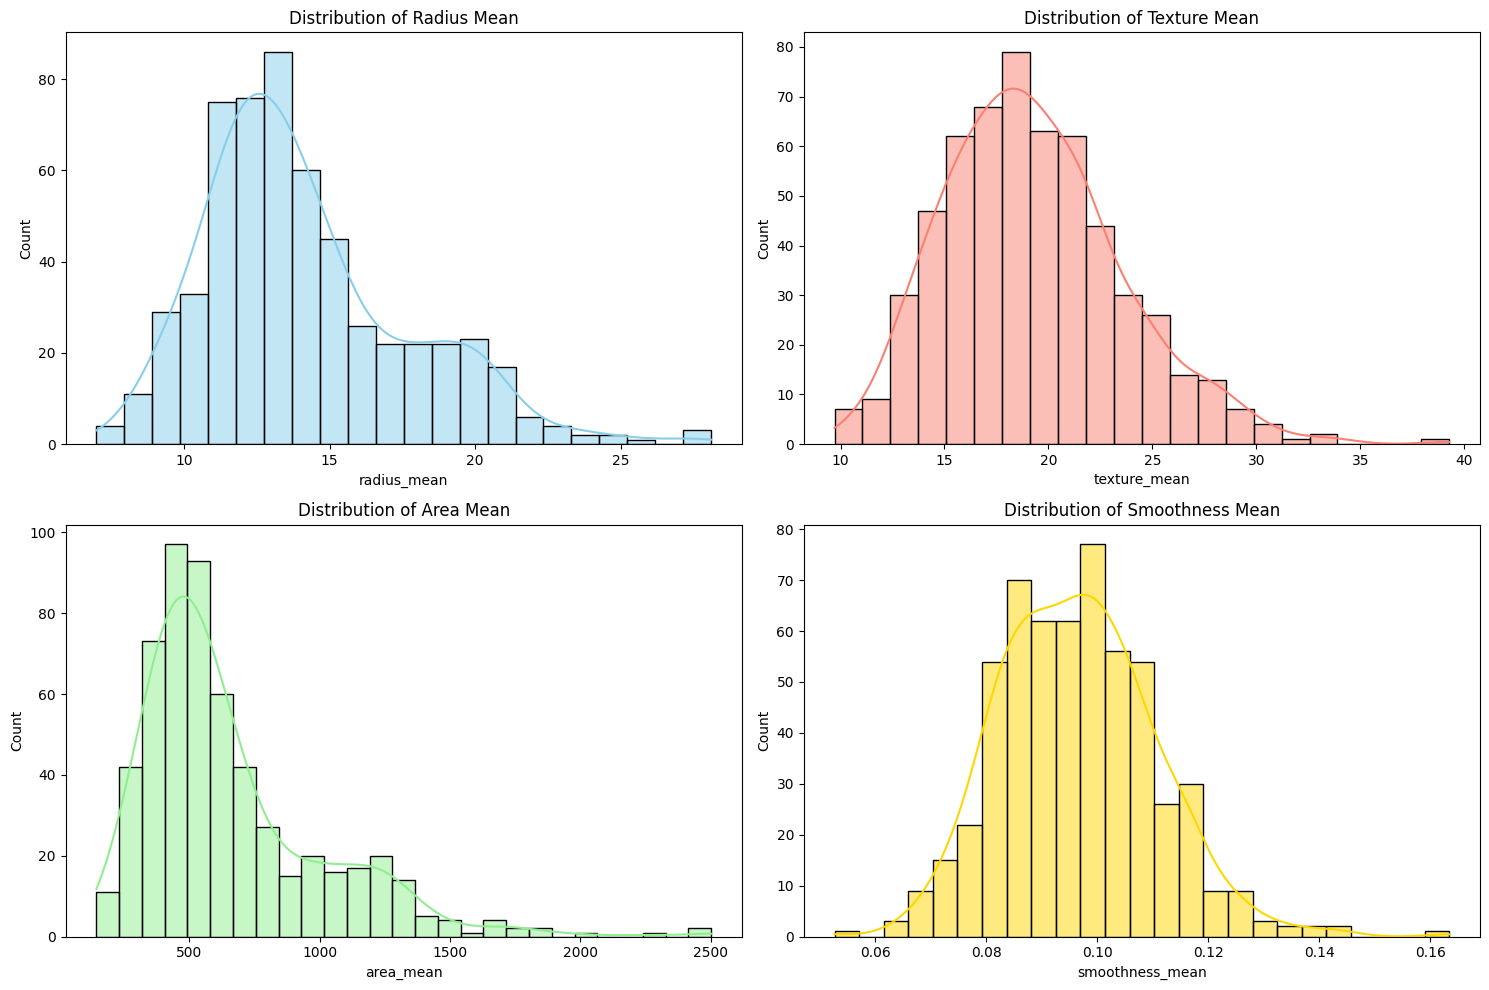

In [163]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data['radius_mean'], kde=True, color='skyblue')
plt.title('Distribution of Radius Mean')

plt.subplot(2, 2, 2)
sns.histplot(data['texture_mean'], kde=True, color='salmon')
plt.title('Distribution of Texture Mean')

plt.subplot(2, 2, 3)
sns.histplot(data['area_mean'], kde=True, color='lightgreen')
plt.title('Distribution of Area Mean')

plt.subplot(2, 2, 4)
sns.histplot(data['smoothness_mean'], kde=True, color='gold')
plt.title('Distribution of Smoothness Mean')

plt.tight_layout()
plt.show()

# Feature Engineering( malignant = 1, benign = 0)

In [164]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Explore correlations between features

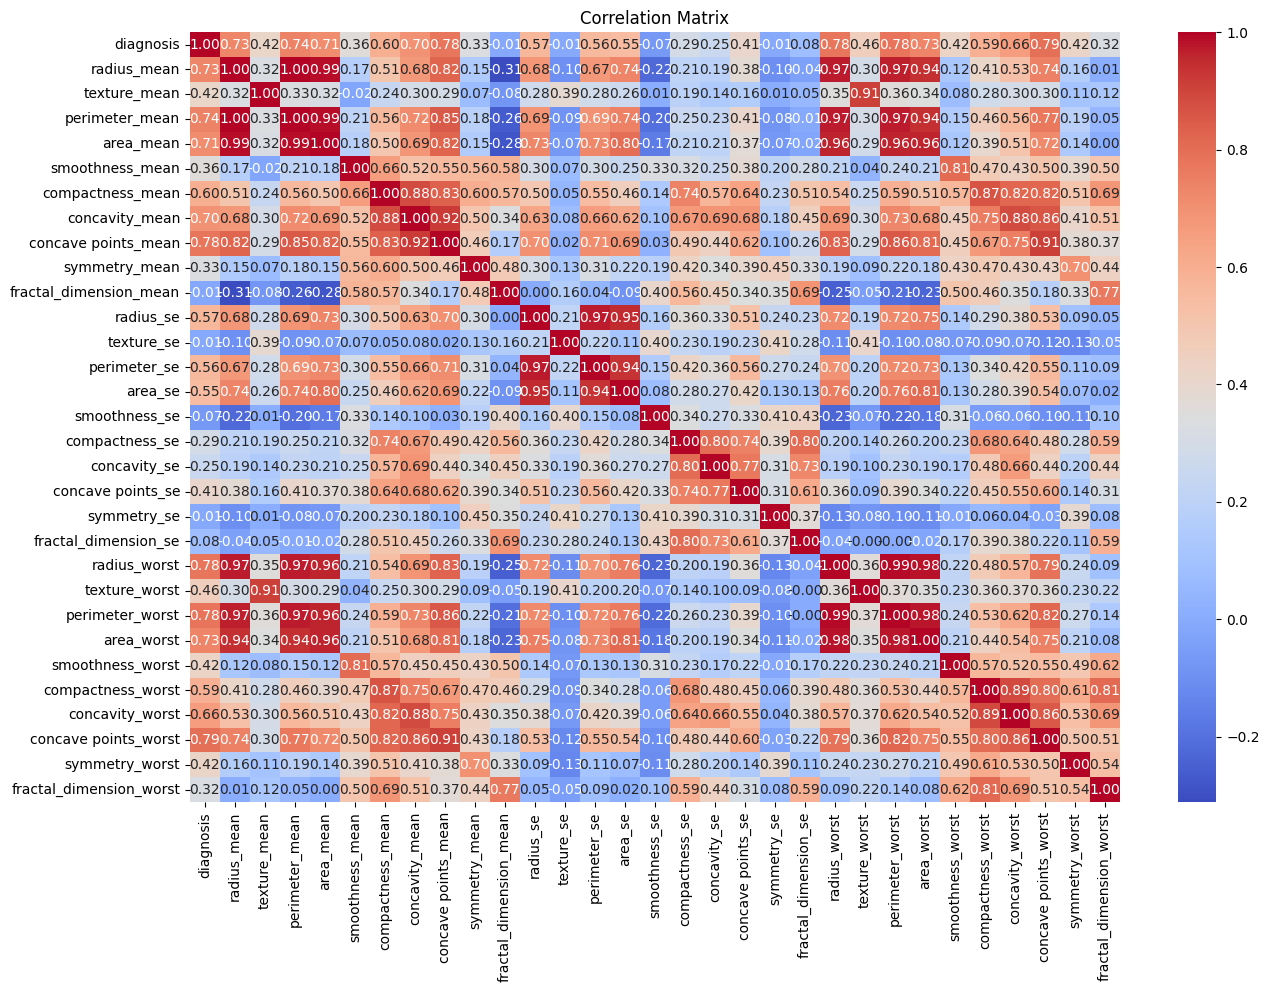

In [165]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Feature Selection

Based on ANOVA F-statistic, we will select k=15 top features, and get those features

In [166]:
# Feature Selection
# Use SelectKBest to select top k features based on ANOVA F-statistic
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

# Select top 15 features
best_features = SelectKBest(f_classif, k=15)
X_best = best_features.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[best_features.get_support()]
print(selected_features)

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


Visualizing all features' F-statistic

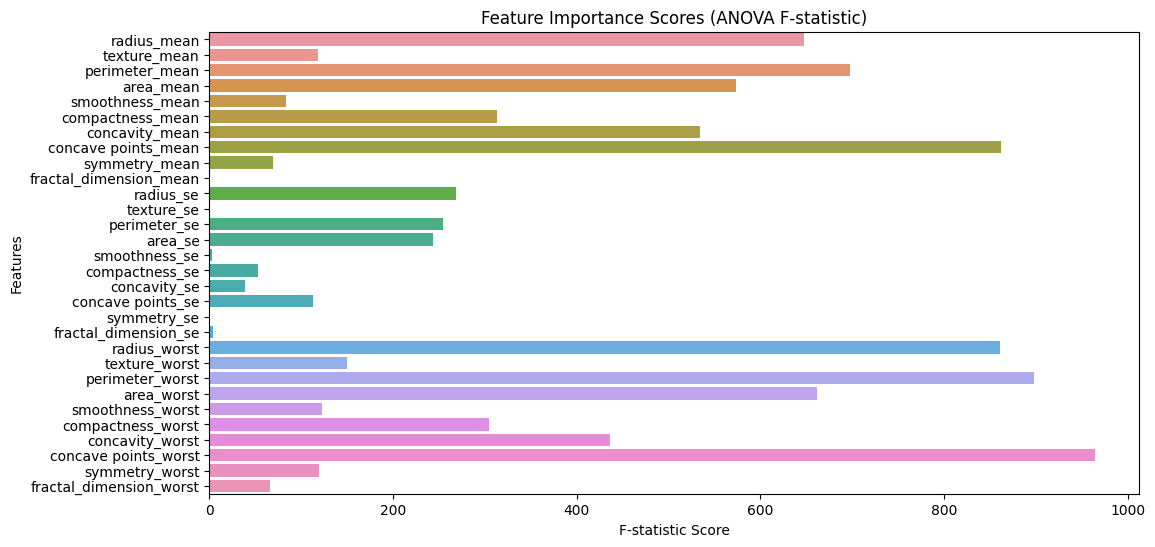

In [167]:
plt.figure(figsize=(12, 6))
sns.barplot(x=best_features.scores_, y=X.columns)
plt.title('Feature Importance Scores (ANOVA F-statistic)')
plt.xlabel('F-statistic Score')
plt.ylabel('Features')
plt.show()

# Splitting and Standardizing

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection and training with hyperparameter tuning

In [169]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(random_state=2), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=2),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']},
             scoring='accuracy')

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



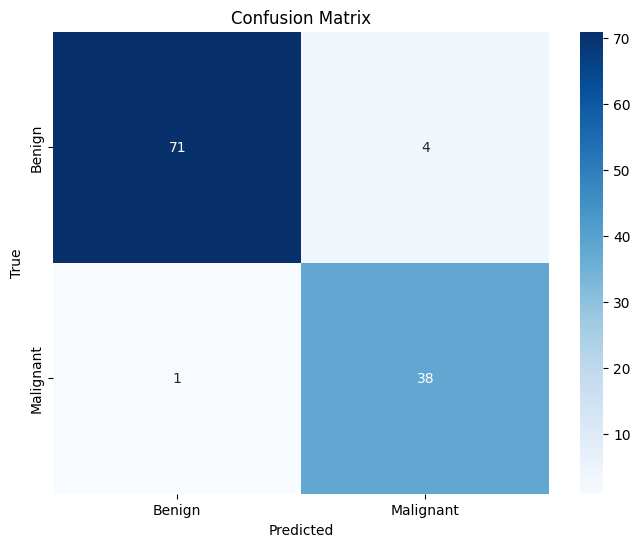

In [170]:
# Get the best model
best_model = grid_search.best_estimator_

# Model evaluation
y_pred = best_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()